In [1]:
from azureml.core import Workspace, Dataset

subscription_id = 'bcfe0c62-8ebe-4df0-a46d-1efcf8739a5b'
resource_group = 'VChamp-Team3'
workspace_name = 'vchamp-team3'


# storage account : Algorithmia, Resource group: VChamp-Team3 and workspace: vchamp-team3.

workspace = Workspace(subscription_id, resource_group, workspace_name)

In [2]:
#['data_team3_synthetic_quality_check']
datastore = workspace.datastores['data_team3_synthetic_train']

In [3]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'ed_visits_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [4]:
ed_visit = dataset.to_pandas_dataframe()

In [5]:
type(ed_visit)

pandas.core.frame.DataFrame

### **Listing all the features of "ED Visits" files.**

**ED** - A hospital emergency department visit is a direct personal exchange between a patient and either a physician or a health care provider working under the physician's supervision, for the purpose of seeking care and receiving personal health services. Internalpatientid - Unique id of the patients.

**Age at ed visit** - Age of the patient at the ed(Emergency department) visit.

**Ed visit start date** - Patient visiting the Emergency department(time is recorded).

**Discharge date ed** - Patient getting discharged from the emergency department.(time is recorded).

**Died during ed visit** - Patient died during the ED visit .

**First listed diagnosis icd10 subcategory** - The category describes the general type of the injury or disease at first

**Second listed diagnosis icd10 subcategory** - The category describes the general type of the injury or disease in the second list.

**State **- Name of the states.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ed_visit.head()

,Column1,Internalpatientid,Age at ed visit,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,0,101689,64.361251,2021-08-26 00:53:30,2021-08-26 04:24:27,False,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia
1,3,107210,71.317300,2022-05-18 11:21:28,2022-05-18 18:30:21,False,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia
2,4,107866,61.164579,2017-06-26 15:41:11,2017-06-26 23:33:50,False,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania
3,5,107906,66.101996,2017-02-17 06:42:34,2017-02-17 08:08:28,False,Dysuria,"Chronic kidney disease, unspecified",New York
4,6,108522,73.598130,2018-09-30 02:47:49,2018-09-30 04:28:57,False,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois


In [8]:
#initial shape of dataframe
ed_visit.shape

(549857, 9)

In [9]:
ed_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549857 entries, 0 to 549856
Data columns (total 9 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   Column1                                    549857 non-null  int64         
 1   Internalpatientid                          549857 non-null  int64         
 2   Age at ed visit                            549857 non-null  float64       
 3   Ed visit start date                        549857 non-null  datetime64[ns]
 4   Discharge date ed                          549779 non-null  datetime64[ns]
 5   Died during ed visit                       549857 non-null  bool          
 6   First listed diagnosis icd10 subcategory   549857 non-null  object        
 7   Second listed diagnosis icd10 subcategory  549857 non-null  object        
 8   State                                      549857 non-null  object        
dtypes: bo

In [10]:
ed_visit.nunique()

Column1                                      549857
Internalpatientid                             58240
Age at ed visit                              549733
Ed visit start date                          549068
Discharge date ed                            549428
Died during ed visit                              2
First listed diagnosis icd10 subcategory       3645
Second listed diagnosis icd10 subcategory      3060
State                                            48
dtype: int64

##### **Dropping the Unnecessary columns from the data-frame "Column1","Ed visit start date","Ed visit start date"**

In [10]:
ed_visit.drop(['Column1','Ed visit start date','Discharge date ed'], axis = 1,inplace = True)
ed_visit.head()

,Internalpatientid,Age at ed visit,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,101689,64.361251,False,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia
1,107210,71.317300,False,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia
2,107866,61.164579,False,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania
3,107906,66.101996,False,Dysuria,"Chronic kidney disease, unspecified",New York
4,108522,73.598130,False,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois


In [14]:
# checking the duplicate values
duplicate = ed_visit.duplicated('Internalpatientid')

In [15]:
if duplicate.any():
  print("Duplicates found in the 'Internalpatientid' column")
else:
  print("No Duplicates found in the 'Internalpatientid' column")

Duplicates found in the 'Internalpatientid' column


In [16]:
duplicate.sum()

491617

In [17]:
ed_visit.columns

Index(['Internalpatientid', 'Age at ed visit', 'Died during ed visit',
       'First listed diagnosis icd10 subcategory',
       'Second listed diagnosis icd10 subcategory', 'State'],
      dtype='object')

In [18]:
ed_visit.describe(include=['object'])

,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
count,549857,549857,549857
unique,3645,3060,48
top,Not specified,Not specified,California
freq,262426,433937,44354


**First listed diagnosis icd10 subcategory have 3645 distinct values & mostly are "Not specified.**

**Second listed diagnosis icd10 subcategory have 3060 distinct values and mostly are "Not Specified.**

In [19]:
# checking the null values

ed_visit.isnull().sum()

Internalpatientid                            0
Age at ed visit                              0
Died during ed visit                         0
First listed diagnosis icd10 subcategory     0
Second listed diagnosis icd10 subcategory    0
State                                        0
dtype: int64

**There are no null values are present in the dataframe**

### **Univariate Analysis**

**Getting the basic satistics out the date like min, max and mean from the Age column**

### **1. Age Histogram**

In [20]:
print(ed_visit['Age at ed visit'].max())
print(ed_visit['Age at ed visit'].min())
print(ed_visit['Age at ed visit'].mean())

108.576240500076
18.342004547296952
70.0342161436122


**Maximum age of the patient is 108**

**Minimum age of the patient is 18**

**Mean of the age column is 70**

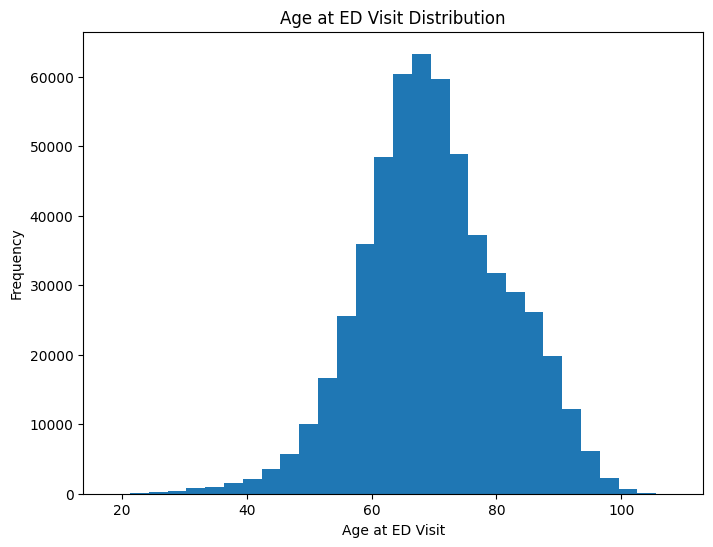

In [21]:
# Plot the distribution of age at ed visit

plt.figure(figsize=(8,6))
plt.hist(ed_visit['Age at ed visit'], bins = 30)
plt.xlabel('Age at ED Visit')
plt.ylabel('Frequency')
plt.title('Age at ED Visit Distribution')
plt.show()

**Finding the Unique values in the column**

**1.First listed diagnosis icd10 subcategory**

**2.Second listed diagnosis icd10 subcategory**

**3.Died during ed visit**

In [24]:
ed_visit['First listed diagnosis icd10 subcategory'].nunique()

3645

In [11]:
ed_visit['First listed diagnosis icd10 subcategory'].value_counts().head(10)

Not specified                                                      262426
Chest pain, unspecified                                             10015
Pain in joint                                                        8763
Dyspnea                                                              8312
Systolic (congestive) heart failure                                  6570
Chronic obstructive pulmonary disease with (acute) exacerbation      6503
Low back pain                                                        6273
Urinary tract infection, site not specified                          5644
Pain in limb, hand, foot, fingers and toes                           4905
Acute bronchitis, unspecified                                        4304
Name: First listed diagnosis icd10 subcategory, dtype: int64

In [14]:
ed_visit['Second listed diagnosis icd10 subcategory'].nunique()

3060

In [16]:
ed_visit['Second listed diagnosis icd10 subcategory'].value_counts().head(10)

Not specified                                                                  433937
Essential (primary) hypertension                                                 2956
Dyspnea                                                                          2494
Urinary tract infection, site not specified                                      1951
Systolic (congestive) heart failure                                              1950
Pain in joint                                                                    1734
Chronic obstructive pulmonary disease, unspecified                               1658
Long term (current) use of anticoagulants and antithrombotics/antiplatelets      1538
Unspecified atrial fibrillation and atrial flutter                               1499
Chest pain, unspecified                                                          1449
Name: Second listed diagnosis icd10 subcategory, dtype: int64

**1. In First listed diagnosis icd10 subcategory we have 3645 unique categories.**

**2. "Not Specified" category having 262426 count(highly frequent) and on second we have "chest pain" having 10015 counts.**

**3. In Second listed diagnosis icd10 subcategory we have 3060 unique categories.**

**4."Not specified category having 433937 count(highly frequent) and on the second we have Essential hypertension 2956**

In [28]:
ed_visit['Died during ed visit'].value_counts()

False    549746
True        111
Name: Died during ed visit, dtype: int64

**111 people died and 549746 are alive.**

In [29]:
ed_visit['Died during ed visit'].value_counts(normalize = True)

False    0.999798
True     0.000202
Name: Died during ed visit, dtype: float64

**99% of the patients did not died during the ed visit.**

### **2. Died during the Ed visit.**

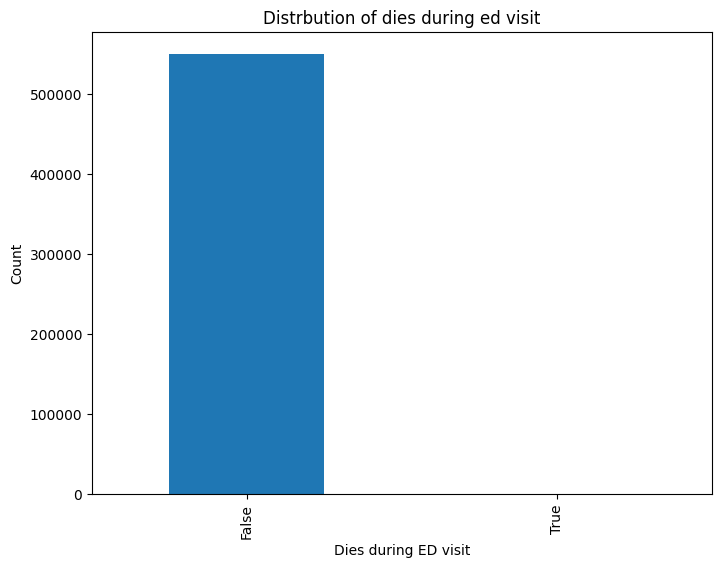

In [30]:
# Analyze the distrbution of died during ed visit

dies_during_visit_counts = ed_visit['Died during ed visit'].value_counts()

#Plot the distrbution of dies during ed visit

plt.figure(figsize=(8,6))
dies_during_visit_counts.plot(kind='bar')
plt.xlabel('Dies during ED visit')
plt.ylabel('Count')
plt.title('Distrbution of dies during ed visit')
plt.show()

###### **Get the top N most frequent medical problem categories in "First listed diagnosis icd10 subcategory"**

### **3. First listed diagnosis icd10 subcategory**

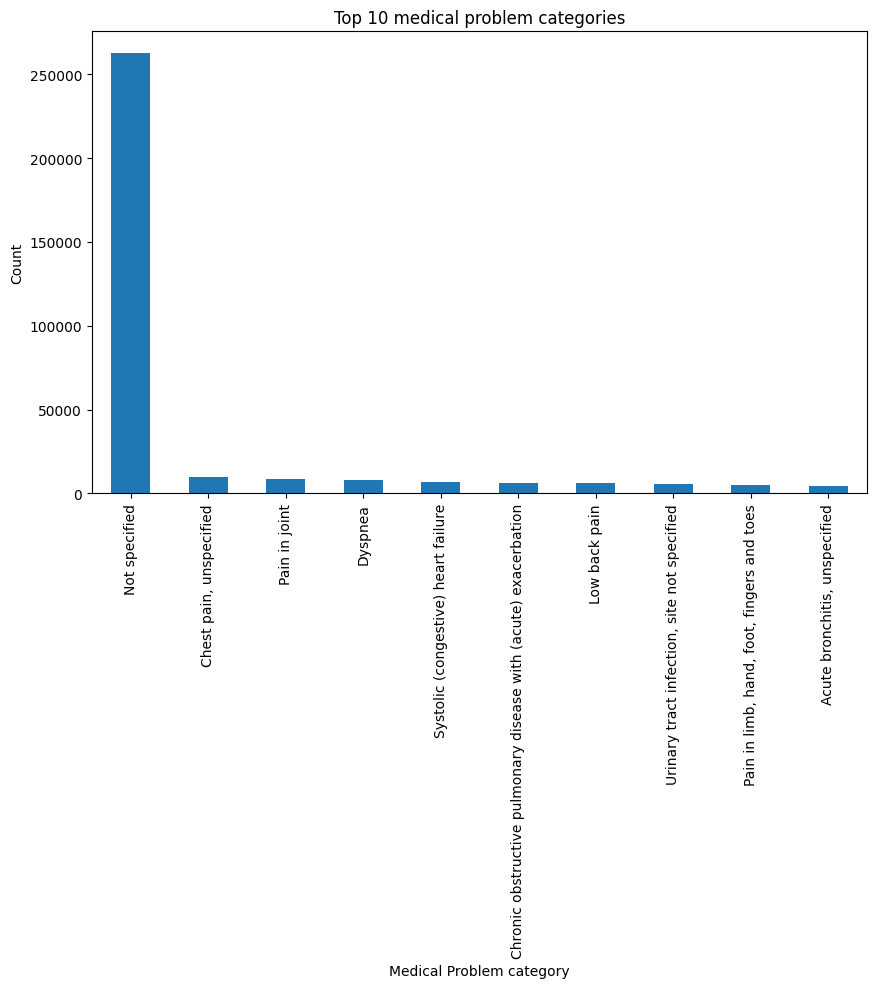

In [26]:
# get the top N most frequenct medical problem categories

top_n = 10
top_categories = ed_visit['First listed diagnosis icd10 subcategory'].value_counts().head(top_n)

#plot the top N medical problem categories

plt.figure(figsize=(10,6))
top_categories.plot(kind = 'bar')
plt.xlabel('Medical Problem category')
plt.ylabel('Count')
plt.title(f'Top {top_n} medical problem categories')
plt.show()

###### **Get the top N most frequent medical problem categories in "Second listed diagnosis icd10 subcategory" column**

### **4. Second listed diagnosis icd10 subcategory**

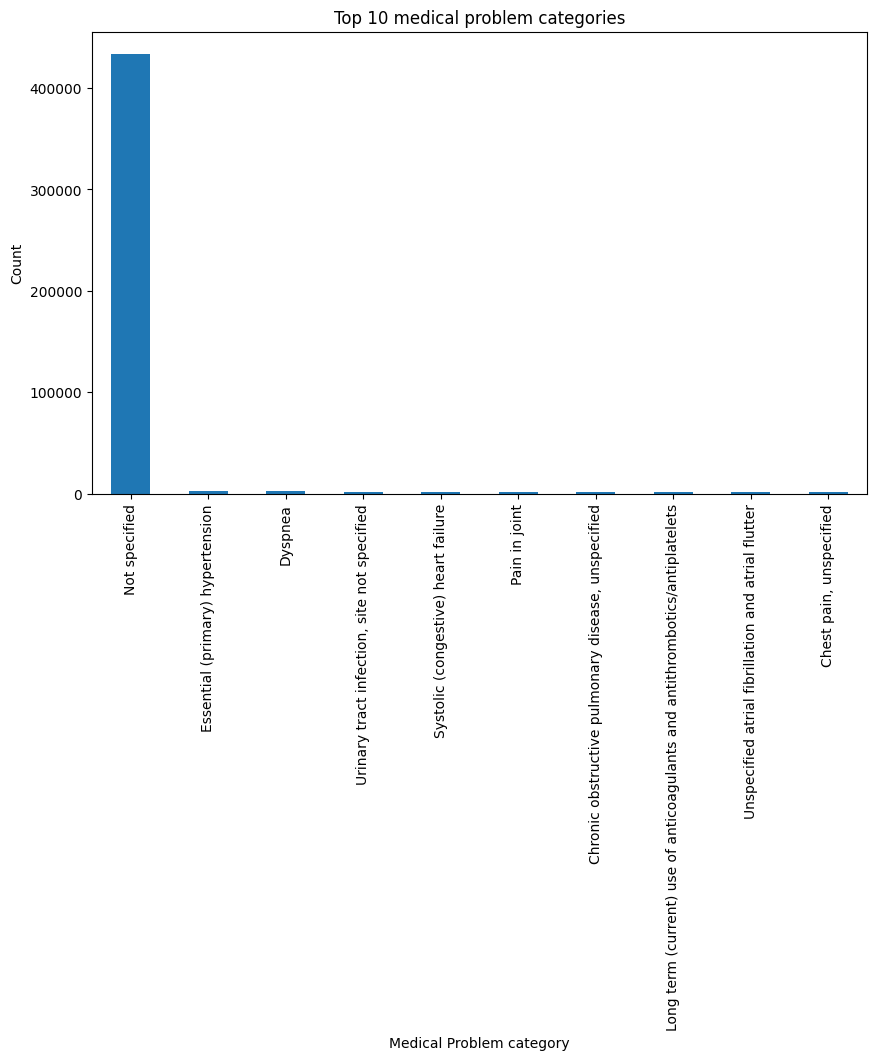

In [31]:
# get the top N most frequenct medical problem categories

top_n = 10
top_categories = ed_visit['Second listed diagnosis icd10 subcategory'].value_counts().head(top_n)

#plot the top N medical problem categories

plt.figure(figsize=(10,6))
top_categories.plot(kind = 'bar')
plt.xlabel('Medical Problem category')
plt.ylabel('Count')
plt.title(f'Top {top_n} medical problem categories')
plt.show()

##### **Occurrences of each state**

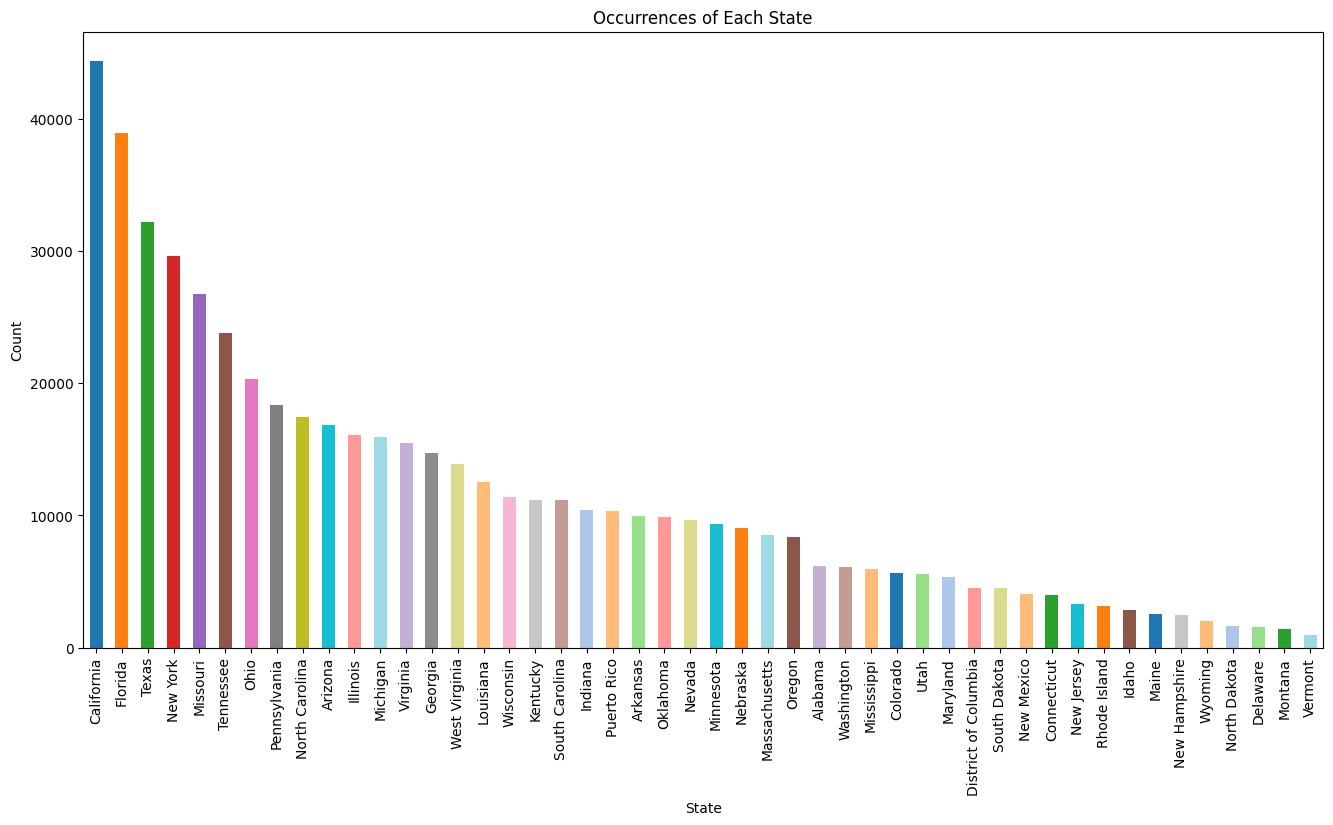

In [32]:
# Count the occurrences of each state
state_counts = ed_visit["State"].value_counts()

# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
                  "#bcbd22", "#17becf", "#ff9896", "#9edae5", "#c5b0d5", "#8c8c8c", "#dbdb8d", "#ffbb78",
                  "#f7b6d2", "#c7c7c7", "#c49c94", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#dbdb8d",
                  "#17becf", "#ff7f0e", "#9edae5", "#8c564b", "#c5b0d5", "#c49c94", "#ffbb78", "#1f77b4",
                  "#98df8a", "#aec7e8", "#ff9896", "#dbdb8d", "#ffbb78", "#2ca02c", "#17becf", "#ff7f0e",
                  "#8c564b", "#1f77b4", "#c7c7c7", "#ffbb78", "#aec7e8", "#98df8a", "#2ca02c", "#9edae5",
                  "#c49c94", "#c5b0d5", "#dbdb8d", "#ff7f0e", "#17becf", "#8c8c8c", "#ff9896", "#7f7f7f"]

# Bar plot with custom colors
plt.figure(figsize=(16, 8))
state_counts.plot(kind="bar", color=custom_palette)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Occurrences of Each State")
plt.show()

**Mostly patients are from california, Florida and Texas.**

In [33]:
# dropping the "State" and "Died during ed visit" columns not of that use for further analysis
ed_visit.drop(['State','Died during ed visit'], axis = 1, inplace = True)

In [34]:
ed_visit.head()

,Internalpatientid,Age at ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory
0,101689,64.361251,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified"
1,107210,71.317300,"Sepsis, unspecified organism","Hypotension, unspecified"
2,107866,61.164579,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified"
3,107906,66.101996,Dysuria,"Chronic kidney disease, unspecified"
4,108522,73.598130,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...


**Now Creating the bucket with the various age ranges and adding 'firsticd-10' & 'second_icd10' to paticular age group range**

In [35]:
age_ranges = [(20, 29.9),(30.0, 39.9), (40.0, 49.9), (50.0, 59.9), (60.0, 69.9),(70.0, 79.9), (80.0, 89.9), (90.0, 99.9), (100.0, 109.9)]

# Create the new columns based on age ranges
for range_start, range_end in age_ranges:
    range_label = f'{range_start}-{range_end}_icd10'
    second_range_label = f'{range_start}-{range_end}_second_icd10'
    ed_visit[range_label] = ed_visit.apply(
        lambda row: row['First listed diagnosis icd10 subcategory'] if range_start <= row['Age at ed visit'] <= range_end else None,
        axis=1
    )
    ed_visit[second_range_label] = ed_visit.apply(
        lambda row: row['Second listed diagnosis icd10 subcategory'] if range_start <= row['Age at ed visit'] <= range_end else None,
        axis=1
    )

# Group the DataFrame by 'Internalpatientid' and concatenate the icd10 values
df_grouped =ed_visit.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))
df_grouped

# Reset the index of the grouped DataFrame
df_grouped= df_grouped.reset_index()
df_grouped

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,20-29.9_icd10,20-29.9_second_icd10,30.0-39.9_icd10,30.0-39.9_second_icd10,40.0-49.9_icd10,40.0-49.9_second_icd10,50.0-59.9_icd10,...,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,80.0-89.9_icd10,80.0-89.9_second_icd10,90.0-99.9_icd10,90.0-99.9_second_icd10,100.0-109.9_icd10,100.0-109.9_second_icd10
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",,,,,,,,...,"Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",,,,,,
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",,,,,,,"Not specified,Not specified,Not specified,Not ...",...,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",,,,,,,,
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",,,,,,,,...,,,,,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",,,,
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",,,,,,,Not specified,...,Other symptoms and signs involving cognitive f...,"Not specified,Not specified",,,,,,,,
4,10,"Not specified,Not specified","Not specified,Not specified",,,,,,,,...,"Not specified,Not specified","Not specified,Not specified",,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58235,169050,"Not specified,Not specified","Not specified,Not specified",,,,,,,Not specified,...,Not specified,Not specified,,,,,,,,
58236,169053,"Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...",,,,,,,,...,,,"Not specified,Cellulitis and acute lymphangiti...","Not specified,Not specified,Not specified,Not ...","Dyspnea,Other symptoms and signs involving cog...","Not specified,Not specified,Adult failure to t...",,,,
58237,169057,"Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...",,,,,,,,...,,,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...","Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...",,,,
58238,169060,Combined systolic (congestive) and diastolic (...,"Not specified,Not specified,Encounter for othe...",,,,,,,,...,Not specified,Not specified,Combined systolic (congestive) and diastolic (...,"Not specified,Encounter for other general exam...",,,,,,


**Out of the 549857 rows, we obtained 58240 rows after establishing the bucketing.**

In [37]:
# Checking the particular patients id
fl= df_grouped[df_grouped["Internalpatientid"]==2]
fl

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,20-29.9_icd10,20-29.9_second_icd10,30.0-39.9_icd10,30.0-39.9_second_icd10,40.0-49.9_icd10,40.0-49.9_second_icd10,50.0-59.9_icd10,...,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,80.0-89.9_icd10,80.0-89.9_second_icd10,90.0-99.9_icd10,90.0-99.9_second_icd10,100.0-109.9_icd10,100.0-109.9_second_icd10
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN,NaN,NaN,NaN,NaN,"Not specified,Not specified,Not specified,Not ...",...,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checking the missing value after creating the bucketing**

In [36]:
# Replace blank values with NaN
df_grouped.replace('', np.nan, inplace=True)

# checking the null values(for bucketing data) 
missing_values_count = df_grouped.isnull().sum()

# taking the total no.of rows
total_rows = df_grouped.shape[0]

# taking the percetage of missing value
missing_percentage = (missing_values_count / total_rows) * 100
#creating the data frame
missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

missing_data_summary

,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
First listed diagnosis icd10 subcategory,0,0.000000
Second listed diagnosis icd10 subcategory,0,0.000000
20-29.9_icd10,58117,99.788805
20-29.9_second_icd10,58117,99.788805
30.0-39.9_icd10,57682,99.041896
30.0-39.9_second_icd10,57682,99.041896
40.0-49.9_icd10,55896,95.975275
40.0-49.9_second_icd10,55896,95.975275
50.0-59.9_icd10,47961,82.350618


**The column "20-29.9_icd10" contain 99% of the missing values.**

**The columns "20-29.9_second_icd10" contain 99% of the missing values.**

**The columns "30.0-39.9_icd10" contain 99% of the missing values.**

**The columns "30.0-39.9_second_icd10" contain 99% of the missing values.**

**The columns "40.0-49.9_icd10" contain 95% of the missing values.**

**The columns "40.0-49.9_second_icd10" contain 95% of the missing values.**

**The columns "50.0-59.9_icd10" contain 82% of the missing values.**

**The columns "50.0-59.9_second_icd10" contain 82% of the missing values.**

**The columns "60.0-69.9_icd10" contain 54% of the missing values.**

**The columns "60.0-69.9_second_icd10" contain 54% of the missing values.**

**The columns "70.0-79.9_icd10" contain 58% of the missing values.**

**The columns "70.0-79.9_second_icd10" contain 58% of the missing values.**

**The columns "80.0-89.9_icd10" contain 75% of the missing values.**

**The columns "80.0-89.9_second_icd10" contain 75% of the missing values.**

**The columns "90.0-99.9_icd10" contain 72% of the missing values.**

**The columns "90.0-99.9_second_icd10" contain 92% of the missing values.**

**The columns "100.0-109.9_icd10" contain 99% of the missing values.**

**The columns "100.0-109.9_second_icd10" contain 99% of the missing values.**

In [38]:
# After dropping the columns which have more than 70 % of missing data.
df_grouped.drop(['20-29.9_icd10','20-29.9_second_icd10','30.0-39.9_icd10','30.0-39.9_second_icd10','40.0-49.9_icd10',
                              '40.0-49.9_second_icd10','50.0-59.9_icd10','50.0-59.9_second_icd10','80.0-89.9_icd10',
                              '80.0-89.9_second_icd10','90.0-99.9_icd10','90.0-99.9_second_icd10','100.0-109.9_icd10',
                              '100.0-109.9_second_icd10'], axis = 1,inplace = True)

In [39]:
df_grouped.head()

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N..."
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",Other symptoms and signs involving cognitive f...,"Not specified,Not specified",NaN,NaN
4,10,"Not specified,Not specified","Not specified,Not specified","Not specified,Not specified","Not specified,Not specified",NaN,NaN


In [40]:
df_grouped.isnull().sum()

Internalpatientid                                0
First listed diagnosis icd10 subcategory         0
Second listed diagnosis icd10 subcategory        0
60.0-69.9_icd10                              31869
60.0-69.9_second_icd10                       31869
70.0-79.9_icd10                              34324
70.0-79.9_second_icd10                       34324
dtype: int64

In [41]:
# Checking the particular patients id
fl= df_grouped[df_grouped["Internalpatientid"]==1]
fl

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N..."


##### **Using the death file do to the Bivariate Analysis with the Demographic static train file**

In [42]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'death_train.csv')])

In [43]:
death_file = dataset.to_pandas_dataframe()

In [44]:
type(death_file)

pandas.core.frame.DataFrame

In [45]:
death_file.head()

,Column1,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10
1,1,100037,75.241135,2008-10-16 15:14:26
2,2,100045,85.399403,2019-01-26 11:33:52
3,3,100095,84.136551,2004-08-10 21:49:35
4,6,10013,68.372126,2007-06-11 00:17:06


In [48]:
death_file

,Column1,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10
1,1,100037,75.241135,2008-10-16 15:14:26
2,2,100045,85.399403,2019-01-26 11:33:52
3,3,100095,84.136551,2004-08-10 21:49:35
4,6,10013,68.372126,2007-06-11 00:17:06
...,...,...,...,...
97279,123343,99827,87.898767,2003-05-13 23:58:55
97280,123344,99842,78.431214,2010-05-25 14:36:27
97281,123345,99847,82.115566,2012-02-20 05:44:33
97282,123347,99872,92.974602,2010-04-18 05:12:36


In [49]:
death_file = death_file.drop('Column1', axis = 1)
death_file.head()

,Internalpatientid,Age at death,Death date
0,100036,72.412770,2015-01-18 20:49:10
1,100037,75.241135,2008-10-16 15:14:26
2,100045,85.399403,2019-01-26 11:33:52
3,100095,84.136551,2004-08-10 21:49:35
4,10013,68.372126,2007-06-11 00:17:06


In [50]:
#Shape of death file datafram
death_file.shape

(97284, 3)

In [51]:
death_file['death'] = 1
death_file.head()

,Internalpatientid,Age at death,Death date,death
0,100036,72.412770,2015-01-18 20:49:10,1
1,100037,75.241135,2008-10-16 15:14:26,1
2,100045,85.399403,2019-01-26 11:33:52,1
3,100095,84.136551,2004-08-10 21:49:35,1
4,10013,68.372126,2007-06-11 00:17:06,1


In [52]:
# describe the "age" column
age_description = death_file["Age at death"].describe()


# Accessing the specific statistics
count = age_description['count']
mean = age_description['mean']
min_value = age_description['min']
max_value = age_description['max']

#print specific statistics
print("Count:", count)
print("Mean:", mean)
print("Min value:", min_value)
print("max_value:", max_value)

Count: 97284.0
Mean: 78.36066132259062
Min value: 22.71159624056341
max_value: 110.22737741931398


In [53]:
print("Training set missing values:\n", death_file.isna().sum())

Training set missing values:
 Internalpatientid    0
Age at death         0
Death date           0
death                0
dtype: int64


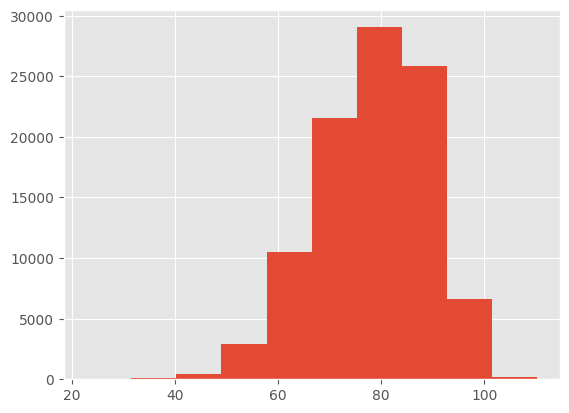

In [54]:
import matplotlib.pyplot as plt
# Histogram for each continuous variable
plt.style.use('ggplot')
plt.hist(death_file["Age at death"], bins=10)
plt.show()

In [55]:
merge_ed_visit_death_left = pd.merge(df_grouped, death_file, how='left',on='Internalpatientid') 

In [56]:
merge_ed_visit_death_left

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,Age at death,Death date,death
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",NaN,NaT,NaN
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN,NaN,NaT,NaN
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN,84.190359,2015-02-24 13:49:53,1.0
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",Other symptoms and signs involving cognitive f...,"Not specified,Not specified",NaN,NaN,NaN,NaT,NaN
4,10,"Not specified,Not specified","Not specified,Not specified","Not specified,Not specified","Not specified,Not specified",NaN,NaN,72.384665,2022-08-25 14:16:51,1.0
...,...,...,...,...,...,...,...,...,...,...
58235,169050,"Not specified,Not specified","Not specified,Not specified",Not specified,Not specified,NaN,NaN,63.323682,2014-10-19 19:20:04,1.0
58236,169053,"Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...",NaN,NaN,"Not specified,Cellulitis and acute lymphangiti...","Not specified,Not specified,Not specified,Not ...",81.349588,2014-02-17 06:35:04,1.0
58237,169057,"Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...",NaN,NaN,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...",NaN,NaT,NaN
58238,169060,Combined systolic (congestive) and diastolic (...,"Not specified,Not specified,Encounter for othe...",Not specified,Not specified,Combined systolic (congestive) and diastolic (...,"Not specified,Encounter for other general exam...",71.832486,2017-10-15 18:34:11,1.0


In [57]:
merge_ed_visit_death_left['death'] = merge_ed_visit_death_left['death'].fillna(0)
merge_ed_visit_death_left.head()

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,Age at death,Death date,death
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",NaN,NaT,0.0
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN,NaN,NaT,0.0
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN,84.190359,2015-02-24 13:49:53,1.0
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",Other symptoms and signs involving cognitive f...,"Not specified,Not specified",NaN,NaN,NaN,NaT,0.0
4,10,"Not specified,Not specified","Not specified,Not specified","Not specified,Not specified","Not specified,Not specified",NaN,NaN,72.384665,2022-08-25 14:16:51,1.0


In [58]:
merge_ed_visit_death_left['death'] = merge_ed_visit_death_left['death'].astype(int)
merge_ed_visit_death_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58240 entries, 0 to 58239
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Internalpatientid                          58240 non-null  int64         
 1   First listed diagnosis icd10 subcategory   58240 non-null  object        
 2   Second listed diagnosis icd10 subcategory  58240 non-null  object        
 3   60.0-69.9_icd10                            26371 non-null  object        
 4   60.0-69.9_second_icd10                     26371 non-null  object        
 5   70.0-79.9_icd10                            23916 non-null  object        
 6   70.0-79.9_second_icd10                     23916 non-null  object        
 7   Age at death                               32902 non-null  float64       
 8   Death date                                 32902 non-null  datetime64[ns]
 9   death            

## **Visualising the dead and alive patients**

In [60]:
merge_ed_visit_death_left['death'].value_counts()

1    32902
0    25338
Name: death, dtype: int64

In [61]:
merge_ed_visit_death_left['death'].value_counts(normalize=True)

1    0.564938
0    0.435062
Name: death, dtype: float64

##### **56% of the patients are dead and 43% are alive.**

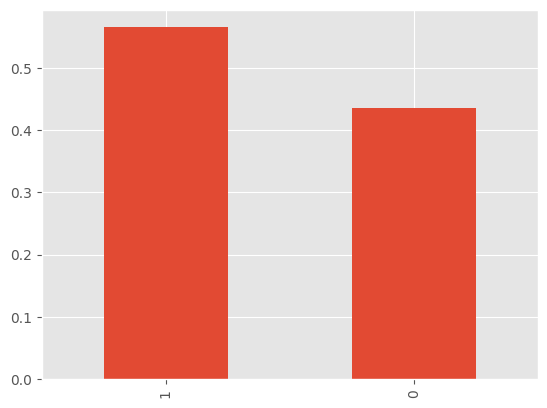

In [62]:
merge_ed_visit_death_left['death'].value_counts(normalize=True).plot(kind='bar')

### **Dataframe of the alive patients.**

In [63]:
df_alive = merge_ed_visit_death_left[merge_ed_visit_death_left["death"]==0]
df_alive

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,Age at death,Death date,death
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",NaN,NaT,0
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN,NaN,NaT,0
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",Other symptoms and signs involving cognitive f...,"Not specified,Not specified",NaN,NaN,NaN,NaT,0
5,11,"Not specified,Pain in joint,Adult failure to t...","Not specified,Not specified,Other specified my...","Not specified,Not specified,Not specified","Not specified,Not specified,Not specified","Pain in joint,Adult failure to thrive","Not specified,Other specified myopathies",NaN,NaT,0
6,13,"Acute respiratory failure,Chest pain, unspecif...","Pneumonia, unspecified organism,Other nonspeci...",NaN,NaN,"Acute respiratory failure,Chest pain, unspecif...","Pneumonia, unspecified organism,Other nonspeci...",NaN,NaT,0
...,...,...,...,...,...,...,...,...,...,...
58221,169017,Calculus of kidney,Not specified,Calculus of kidney,Not specified,NaN,NaN,NaN,NaT,0
58229,169033,Not specified,Not specified,NaN,NaN,NaN,NaN,NaN,NaT,0
58232,169041,Unspecified atrial fibrillation and atrial flu...,"Not specified,Not specified,Not specified,End ...",NaN,NaN,NaN,NaN,NaN,NaT,0
58234,169047,"Acute upper respiratory infection, unspecified...","Not specified,Not specified,Other foreign body...","Acute upper respiratory infection, unspecified...","Not specified,Not specified,Other foreign body...",NaN,NaN,NaN,NaT,0


#### **Dataframe of the dead patients.**

In [64]:
df_dead = merge_ed_visit_death_left[merge_ed_visit_death_left["death"]==1]
df_dead

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,Age at death,Death date,death
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN,84.190359,2015-02-24 13:49:53,1
4,10,"Not specified,Not specified","Not specified,Not specified","Not specified,Not specified","Not specified,Not specified",NaN,NaN,72.384665,2022-08-25 14:16:51,1
7,15,"Respiratory failure, unspecified,Combined syst...",Unspecified atrial fibrillation and atrial flu...,NaN,NaN,NaN,NaN,86.598848,2019-01-16 21:05:39,1
8,16,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...",NaN,NaN,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...",78.894455,2016-01-13 22:09:20,1
9,19,"Chest pain, unspecified,Unstable angina,Not sp...","Syncope and collapse,Long term (current) use o...",Not specified,Not specified,"Chest pain, unspecified,Unstable angina","Syncope and collapse,Long term (current) use o...",71.207349,2016-01-20 06:51:50,1
...,...,...,...,...,...,...,...,...,...,...
58233,169043,Not specified,Not specified,NaN,NaN,Not specified,Not specified,75.760530,2013-08-11 11:22:06,1
58235,169050,"Not specified,Not specified","Not specified,Not specified",Not specified,Not specified,NaN,NaN,63.323682,2014-10-19 19:20:04,1
58236,169053,"Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...",NaN,NaN,"Not specified,Cellulitis and acute lymphangiti...","Not specified,Not specified,Not specified,Not ...",81.349588,2014-02-17 06:35:04,1
58238,169060,Combined systolic (congestive) and diastolic (...,"Not specified,Not specified,Encounter for othe...",Not specified,Not specified,Combined systolic (congestive) and diastolic (...,"Not specified,Encounter for other general exam...",71.832486,2017-10-15 18:34:11,1


**Missing summary for the patients which are dead**

In [65]:
# Replace blank values with NaN
df_dead.replace('', np.nan, inplace=True)

# checking the null values 
missing_values_count = df_dead.isnull().sum()
# taking the total no.of rows
total_rows = df_dead.shape[0]

# taking the percetage of missing value
missing_percentage = (missing_values_count / total_rows) * 100
#creating the data frame
missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

missing_data_summary

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
First listed diagnosis icd10 subcategory,0,0.000000
Second listed diagnosis icd10 subcategory,0,0.000000
60.0-69.9_icd10,20918,63.576682
60.0-69.9_second_icd10,20918,63.576682
70.0-79.9_icd10,20458,62.178591
70.0-79.9_second_icd10,20458,62.178591
Age at death,0,0.000000
Death date,0,0.000000
death,0,0.000000


### **This is our ed_visit & death file proper dataframe**

In [66]:
merge_ed_visit_death_left.drop(['Age at death','Death date'],axis = 1, inplace = True)
merge_ed_visit_death_left.head()

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,death
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",0
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN,0
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN,1
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",Other symptoms and signs involving cognitive f...,"Not specified,Not specified",NaN,NaN,0
4,10,"Not specified,Not specified","Not specified,Not specified","Not specified,Not specified","Not specified,Not specified",NaN,NaN,1


In [67]:
icd60_69_death_crosstab = pd.crosstab(merge_ed_visit_death_left['60.0-69.9_icd10'],merge_ed_visit_death_left['death'])
print(icd60_69_death_crosstab)

death                                               0  1
60.0-69.9_icd10                                         
(Censored)                                          8  4
(Censored),(Censored)                               1  0
(Censored),Atopic dermatitis, unspecified,Not s...  1  0
(Censored),Cellulitis and acute lymphangitis of...  1  0
(Censored),Cellulitis and acute lymphangitis, u...  0  1
...                                                .. ..
Zoster without complications,Pleural effusion i...  1  0
Zoster without complications,Supraventricular t...  0  1
Zoster without complications,Systolic (congesti...  1  0
Zoster without complications,Tachycardia, unspe...  0  1
Zoster without complications,Zoster with other ...  1  0

[14012 rows x 2 columns]


#### **(1). 60.0-69.9_icd10**

In [70]:
df_dead["60.0-69.9_icd10"].nunique()

5350

**The "60.0-69.9_icd10" columns 5350 have distinct value. however we have to check the value counts because most the values are "Not specified"**

In [71]:
#it will take above 200 values count
df_dead["60.0-69.9_icd10"].value_counts().loc[lambda x: x>200]

Not specified                                                                                        1901
Not specified,Not specified                                                                          1054
Not specified,Not specified,Not specified                                                             748
Not specified,Not specified,Not specified,Not specified                                               521
Not specified,Not specified,Not specified,Not specified,Not specified                                 411
Not specified,Not specified,Not specified,Not specified,Not specified,Not specified                   300
Not specified,Not specified,Not specified,Not specified,Not specified,Not specified,Not specified     255
Name: 60.0-69.9_icd10, dtype: int64

**Most frequent is "Not Specified".**

#### **(2).60.0-69.9_second_icd10**

In [72]:
#it will take above 200 values count
df_dead["60.0-69.9_second_icd10"].value_counts().loc[lambda x: x>200]

Not specified                                                                                                                    2207
Not specified,Not specified                                                                                                      1307
Not specified,Not specified,Not specified                                                                                         899
Not specified,Not specified,Not specified,Not specified                                                                           667
Not specified,Not specified,Not specified,Not specified,Not specified                                                             529
Not specified,Not specified,Not specified,Not specified,Not specified,Not specified                                               384
Not specified,Not specified,Not specified,Not specified,Not specified,Not specified,Not specified                                 327
Not specified,Not specified,Not specified,Not specified,Not sp

**Most frequent is "Not Specified"**

#### **(3). 70.0-79.9_icd10**

In [74]:
#it will take above 200 values count
df_dead["70.0-79.9_icd10"].value_counts().loc[lambda x: x>200]

Not specified                                                                          1766
Not specified,Not specified                                                             968
Not specified,Not specified,Not specified                                               641
Not specified,Not specified,Not specified,Not specified                                 468
Not specified,Not specified,Not specified,Not specified,Not specified                   317
Not specified,Not specified,Not specified,Not specified,Not specified,Not specified     236
Name: 70.0-79.9_icd10, dtype: int64

**Most frequenct is "Not Specified".**

#### **(4). 70.0-79.9_second_icd10**

In [75]:
#it will take above 200 values count
df_dead["70.0-79.9_second_icd10"].value_counts().loc[lambda x: x>200]

Not specified                                                                                                      2337
Not specified,Not specified                                                                                        1301
Not specified,Not specified,Not specified                                                                           850
Not specified,Not specified,Not specified,Not specified                                                             592
Not specified,Not specified,Not specified,Not specified,Not specified                                               414
Not specified,Not specified,Not specified,Not specified,Not specified,Not specified                                 288
Not specified,Not specified,Not specified,Not specified,Not specified,Not specified,Not specified                   236
Not specified,Not specified,Not specified,Not specified,Not specified,Not specified,Not specified,Not specified     201
Name: 70.0-79.9_second_icd10, dtype: int

**Most frequent is "Not Specified".**